In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import json
plt.style.use('./paper.mplstyle')

In [2]:
def plot_trends(filename, data_list, label_list, key, xlabel="Time (days)", ylabel="y"):

    fig, ax = plt.subplots()
    
    for data, label in zip(data_list, label_list):
        x = np.array(data[key]["Times"])/24/3600
        y = np.array(data[key]["Values"])
        ax.plot(x, y, label=label)
    
    if len(data_list)>1:
        ax.legend()

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()

    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()
    
def plot_trends_1(filename, data_list, label_list, key, xi, zi, xlabel="Time (days)", ylabel="y", title="", ylim=None):

    fig, ax = plt.subplots()
    
    for data, label in zip(data_list, label_list):
        x = np.array(data[key]["Times"])/24/3600
        y = np.array(data[key]["Values"])[:,xi,zi]
        ax.plot(x, y, label=label)
    
    if len(data_list)>1:
        ax.legend()

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim( ylim )

    ax.grid()

    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()
    
def plot_trends_m(filename, data_list, label_list, key, xlabel="Time (days)", ylabel="y", title="", ylim=None):

    fig, ax = plt.subplots()
    
    for data, label in zip(data_list, label_list):
        x = np.array(data[key]["Times"])/24/3600
        
        ym = []
        y = np.array(data[key]["Values"])
        for i in range(y.shape[0]):
            yi = y[i,:,:].flatten()
            ym.append(np.mean(yi))
        ym = np.array(ym)
        ax.plot(x, ym, label=label)
    
    if len(data_list)>1:
        ax.legend()

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim( ylim )

    ax.grid()

    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [3]:
def plot_profiles_1(
    filename,
    data,
    ti,
    label,
    key,
    xlabel="z",
    ylabel="y",
    ylim=None,
    color="k",
    kind="mean"
):

    fig = plt.figure()
    ax = fig.add_subplot()
    x=data[key]["Domains"][1]
    if kind == "inlet":
        y=np.array(data[key]["Values"])[ti,0,:]
    elif kind == "outlet":
        y=np.array(data[key]["Values"])[ti,-1,:]
    else:
        y=np.mean(np.array(data[key]["Values"][ti]),axis=0)
    t=data[key]["Times"][ti]/24/3600
    ax.plot(x, y, label=label, marker=".", linewidth=0, color=color)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        ax.set_ylim( ylim )
    #ax.legend()
    ax.set_title(label.format(int(t)))
    ax.grid()
    plt.grid(b=True, axis='x', which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [4]:
def plot_profiles_1d(
    filename,
    data,
    ti,
    label,
    key,
    xlabel="z",
    ylabel="y",
    ylim=None,
    color="k",
    kind="mean"
):

    fig = plt.figure()
    ax = fig.add_subplot()
    x=data[key]["Domains"][1]
    if kind == "inlet":
        y0=np.array(data[key]["Values"])[0,0,:]
        y=np.array(data[key]["Values"])[ti,0,:]
    elif kind == "outlet":
        y0=np.array(data[key]["Values"])[0,-1,:]
        y=np.array(data[key]["Values"])[ti,-1,:]
    else:
        y0=np.mean(np.array(data[key]["Values"][0]),axis=0)
        y=np.mean(np.array(data[key]["Values"][ti]),axis=0)
    t=data[key]["Times"][ti]/24/3600
    ax.stem(x, 100*(y-y0)/y0)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        ax.set_ylim( ylim )
    #ax.legend()
    ax.set_title(label.format(int(t)))
    ax.grid()
    plt.grid(b=True, axis='x', which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [5]:
def plot_trends_2(filename, data_list, label_list, row, key, xlabel="Time (days)", ylabel="y", title="z=1", ylim=None):

    fig = plt.figure()

    for data, label in zip (data_list, label_list):

        ax = fig.add_subplot()
        t=np.array(data[key]["Times"])/24/3600
        y0=np.mean(np.array(data[key]["Values"])[:,:,row],axis=1)

        ax.plot(t, y0, label=label)

        ax.set_ylabel(ylabel)

        ax.set_xlabel(xlabel)
        ax.set_title(title)
        ax.grid()

    if ylim is not None:
        ax.set_ylim(ylim)
    ax.legend()

    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [6]:
def plot_profiles(
    filename,
    data_list,
    label_list,
    ti,
    zi,
    key,
    xlabel="Axial position",
    ylabel="y",
    ylim=None,
    color="k",
    kind="mean"
):

    fig = plt.figure()
    for data, label in zip(data_list, label_list):
        
        ax = fig.add_subplot()
        x=data[key]["Domains"][0]
        y=np.array(data[key]["Values"])[ti,:,zi]
        t=data[key]["Times"][ti]/24/3600
        ax.plot(x, y, label=label)
        
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        ax.set_ylim( ylim )
    ax.legend()
    ax.set_title("Day {} / z={} ".format(int(t), int(zi+1)) )
    ax.grid()
    plt.grid(b=True, axis='x', which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [7]:
def plot_profiles_t(
    filename,
    data,
    tis,
    zi,
    key,
    xlabel="Axial position",
    ylabel="y",
    ylim=None,
    color="k",
    title=""
):

    fig = plt.figure()
    ax = fig.add_subplot()

    for ti in tis:
        x=data[key]["Domains"][0]
        y=np.array(data[key]["Values"])[ti,:,zi]
        t=data[key]["Times"][ti]/24/3600
        ax.plot(x, y, label="Day {}".format(int(t)))
        
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if ylim is not None:
        ax.set_ylim( ylim )
    ax.legend()
    ax.set_title(title)
    ax.grid()
    plt.grid(b=True, axis='x', which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.savefig('./figures/{}.pdf'.format(filename), dpi=600)
    plt.show()

In [8]:
def pump_curve(x, a00, a01, a02):
    return a00 + a01 * x + a02 * x ** 2

def plot_pump(filename, output, output_fixedW, tis, dwval=125):

    c = [output["node_B.a0"]["Values"][0],output["node_B.a1"]["Values"][0],output["node_B.a2"]["Values"][0]]

    wmin = np.min(np.array(output["node_B.w"]["Values"]))
    wmax = np.max(np.array(output["node_B.w"]["Values"]))
    dw = wmax - wmin

    w_curve = np.linspace(wmin - dw*0.5, wmax + dw*0.5, 50)
    P_curve = pump_curve(w_curve, *c)

    h_curve = P_curve/(1000 * 9.81)

    w_sim = np.array(output["node_B.w"]["Values"])
    P_sim = np.array(output["node_B.P"]["Values"])
    h_sim = P_sim/(1000 * 9.81)

    w_initial = output["node_B.w"]["Values"][0]
    P_initial = output["node_B.P"]["Values"][0]
    h_initial = P_initial/(1000 * 9.81)

    t_final = int(output["node_B.w"]["Times"][-1]/24/3600)
    w_final = output["node_B.w"]["Values"][-1]
    P_final = output["node_B.P"]["Values"][-1]
    h_final = P_final/(1000 * 9.81)


    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(w_sim, h_sim, label="Simulation", linewidth=3)
    ax.plot(w_curve, h_curve, label="Pump Curve", linewidth=2)

    for ti in tis:
        t = int(output["node_B.w"]["Times"][ti]/24/3600)
        w = output["node_B.w"]["Values"][ti]
        P = output["node_B.P"]["Values"][ti]
        h = P/(1000 * 9.81)
        ax.plot(w, h, "ok")
        ax.text(w+dwval, h, "Day {}".format(int(t)), fontsize="medium")
            

    ax.set_xlabel("Flow rate (kg/s)")
    ax.set_ylabel("Pump head (m)")
    #ax.set_ylim( ylim )
    ax.legend()
    ax.grid()
    plt.savefig('./figures/{}_1.pdf'.format(filename), dpi=600)
    plt.show()

In [9]:
def plot_(name="colesoncove", last_row_index=30, Rf_ylim=(0.000225, 0.000425), Tout_ylim=None, Rf_ylim_trend=None, Rf_ylim_trend_t=None):

    case = name+"_cs_pumped.out.json"
    with open(case) as f:
        json_data=f.read()
    output = json.loads(json_data)

    case = name+"_cs_pumped_season.out.json"
    with open(case) as f:
        json_data=f.read()
    output_s = json.loads(json_data)

    case = name+"_cs_fixedW.out.json"
    with open(case) as f:
        json_data=f.read()
    output_fixedW = json.loads(json_data)

    case = name+"_cs_fixedW_season.out.json"
    with open(case) as f:
        json_data=f.read()
    output_fixedW_s = json.loads(json_data)

    plot_trends(name+"_trend_Pvap",
        [output, output_fixedW, output_s, output_fixedW_s],
        ["Variable flow rate", "Constant flow rate", "Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Pext",
        ylabel = "Steam Pressure (Pa)"
       )

    plot_trends(name+"_trend_Tvap",
        [output, output_fixedW, output_s, output_fixedW_s],
        ["Variable flow rate", "Constant flow rate", "Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Text",
        ylabel = "Steam Temperature (K)"
       )

    plot_trends(name+"_trend_water_Tin",
        [output, output_s,],
        ["Without seasonal effect","With seasonal effect"],
        "node_B.T",
        ylabel = "Water temperature for condenser intlet (K)"
       )

    plot_trends(name+"_trend_water_flowrate",
        [output_s,],
        ["Variable flow rate with seasonal effect"],
        "node_B.w",
        ylabel = "Cooling water flow rate (kg/s)"
       )

    plot_trends(name+"_trend_water_Pin",
        [output, output_fixedW, output_s, output_fixedW_s],
        ["Variable flow rate", "Constant flow rate", "Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "node_B.P",
        ylabel = "Water pressure for condenser inlet (Pa)"
       )

    plot_trends(name+"_trend_water_Tout",
        [output, output_fixedW, output_s, output_fixedW_s],
        ["Variable flow rate", "Constant flow rate", "Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "node_C.T",
        ylabel = "Water temperature for condenser outlet (K)"
       )

    plot_trends_m(name+"_trend_average_Rf",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Rf",
        ylabel = "Average Rf (m$^2$ K/W)",
        ylim=Rf_ylim_trend,
       )
    
    plot_trends_1(name+"_trend_Rf_inlet_top_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Rf",
        0, 0,
        ylabel = "Rf (m$^2$ K/W)",
        title = "At top row's intlet",
        ylim=Rf_ylim_trend,
       )

    plot_trends_1(name+"_trend_Rf_inlet_bottom_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],

        "condenser.Rf",
        0, -1,
        ylabel = "Rf (m$^2$ K/W)",
        title = "At bottom row's intlet",
        ylim=Rf_ylim_trend,
    )

    plot_trends_1(name+"_trend_Rf_outlet_top_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Rf",
        -1, 0,
        ylabel = "Rf (m$^2$ K/W)",
        title = "At top row's outlet",
        ylim=Rf_ylim_trend,


       )

    plot_trends_1(name+"_trend_Rf_outlet_bottom_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        "condenser.Rf",
        -1, -1,
        ylabel = "Rf (m$^2$ K/W)",
        title = "At bottom row's outlet",
        ylim=Rf_ylim_trend,
    )

    plot_trends_1(name+"_trend_T_outlet_top_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],

        "condenser.T",
        -1, 0,
        ylabel = "Water temperature (K)",
        title = "At top row's outlet",
        ylim=Tout_ylim
       )

    plot_trends_1(name+"_trend_T_outlet_bottom_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],

        "condenser.T",
        -1, -1,
        ylabel = "Water temperature (K)",
        title = "At bottom row's outlet",
        ylim=Tout_ylim
    )
    
    plot_profiles_1(name+"_profile_1_k_day_0",
        output_s,
        0,
        "Day 0",
        "condenser.k",
        ylabel = "Flow rate per tube (kg/s)",
        color = "b"
       )

    plot_profiles_1(name+"_profile_1_k_day_1000",
        output_s,
        -1,
        "Variable flowrate / Day {}",
        "condenser.k",
        ylabel = "Flow rate per tube (kg/s)",
        color="k"
       )

    plot_profiles_1(name+"_profile_1_k_fixedW_day_1000",
        output_fixedW_s,
        -1,
        "Constant flowrate / Day {}",
        "condenser.k",
        ylabel = "Flow rate per tube (kg/s)",
        color="r"
       )
    
    plot_profiles_1d(name+"_profile_1d_k_pumped_day_1000",
        output_s,
        -1,
        "Variable flowrate / Day {}",
        "condenser.k",
        ylabel = "Flowrate deviation per tube (\%)",
        color="k"
       )

    plot_profiles_1d(name+"_profile_1d_k_fixedW_day_1000",
        output_fixedW_s,
        -1,
        "Constant flowrate / Day {}",
        "condenser.k",
        ylabel = "Flow rate deviation per tube (\%)",
        color="r"
       )


    plot_trends_2(name+"_trend_v_top_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],
        0,
        "condenser.v",
        ylabel = "Average velocity (m/s)",
        title="At top row (z=1)"
        #ylim=(0.35,0.6)
    )

    plot_profiles(name+"_profile_Rf_top_row",
        [output_s, output_fixedW_s],
        [ "Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],

        -1,
        0,
        "condenser.Rf",
        ylabel = "Rf (m$^2$ K/W)",
        ylim=Rf_ylim
       )

    plot_profiles(name+"_profile_Rf_bottom_row",
        [output_s, output_fixedW_s],
        ["Variable flow rate with seasonal effect", "Constant flow rate with seasonal effect"],

        -1,
        last_row_index,
        "condenser.Rf",
        ylabel = "Rf (m$^2$ K/W)",
        ylim=Rf_ylim
       )

    plot_profiles_t(name+"_profiles_t_Rf_top_row",
        output_s,
        (14, 29, 54, -1),
        0,
        "condenser.Rf",
        ylabel = "Rf (m$^2$ K/W)",
        ylim=Rf_ylim_trend_t,
        title="At top row"
       )

    plot_profiles_t(name+"_profiles_t_bottom_row",
        output_s,
        (14, 29, 54, -1),
        last_row_index,
        "condenser.Rf",
        ylabel = "Rf (m$^2$ K/W)",
        ylim=Rf_ylim_trend_t,
        title="At bottom row"
       )

    
    plot_pump(name+"_pump_curve", output, output_fixedW, (0, 14, 29, 54, -1))


## Coleson Cove Case

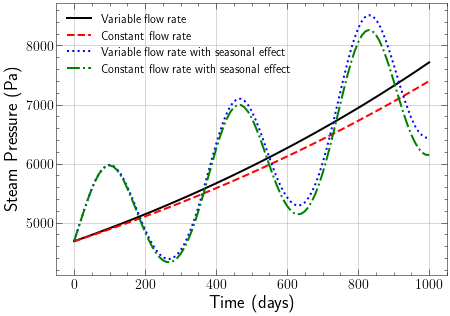

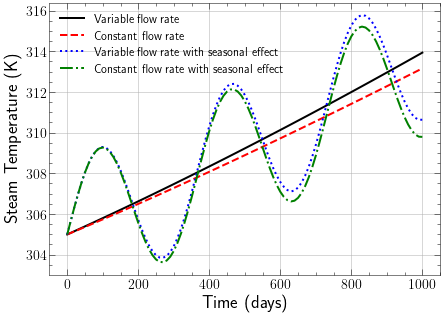

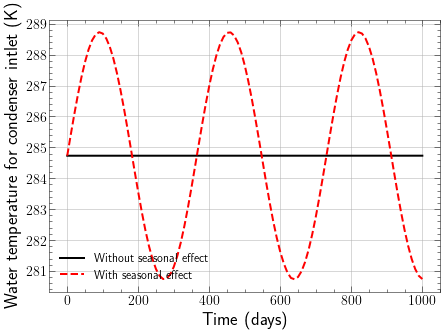

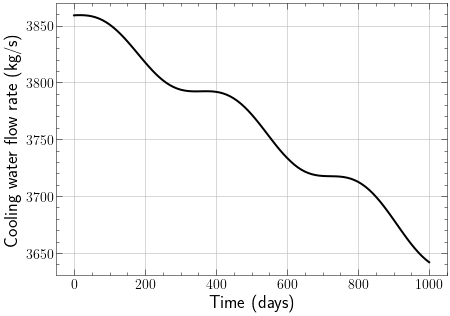

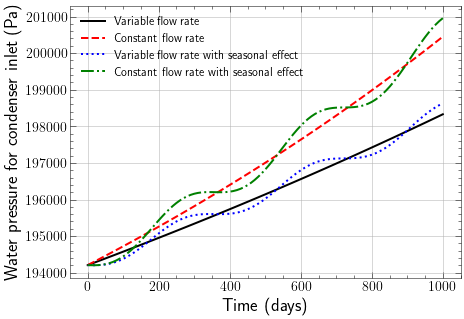

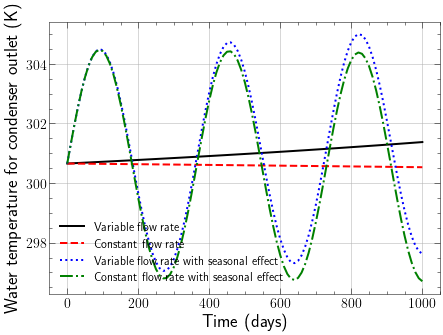

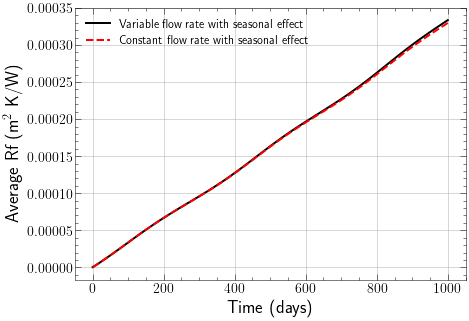

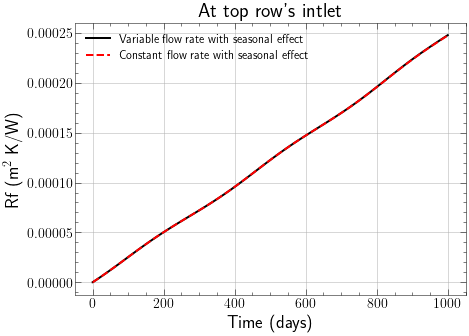

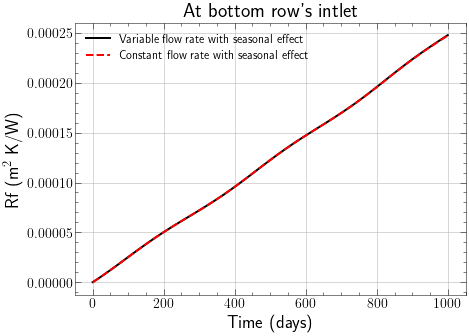

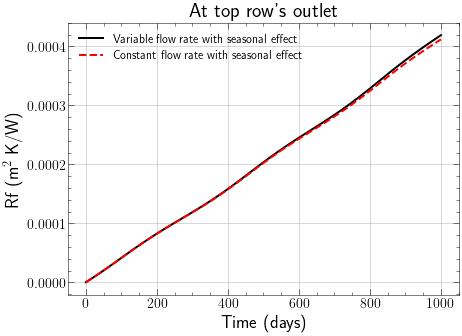

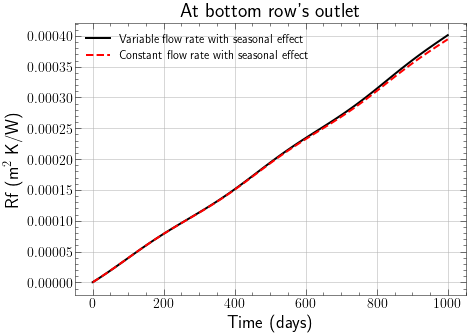

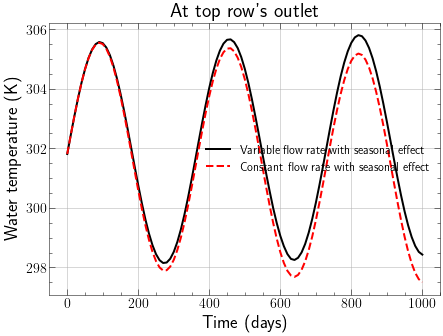

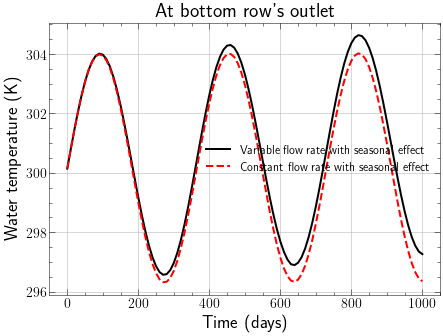

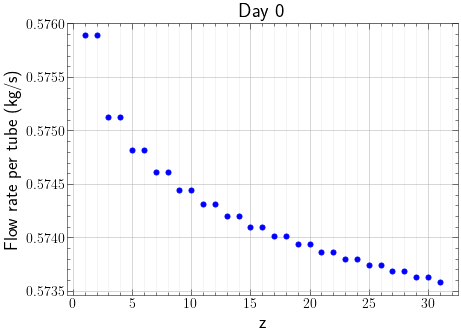

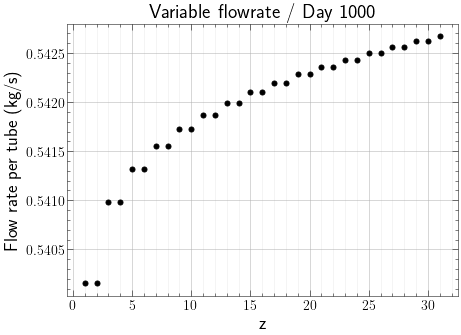

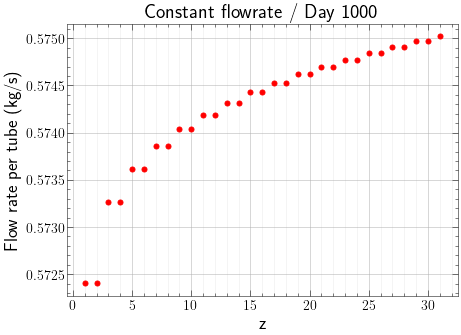

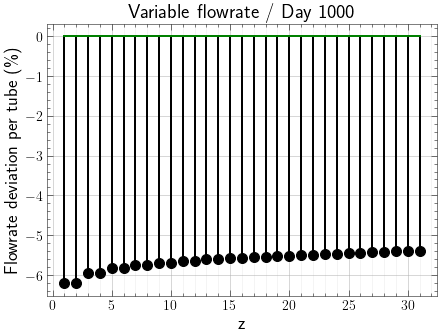

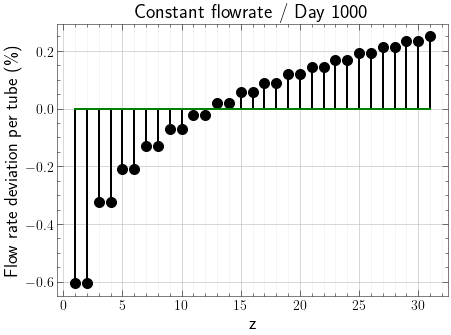

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


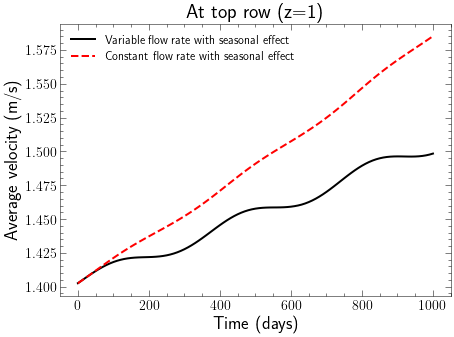

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


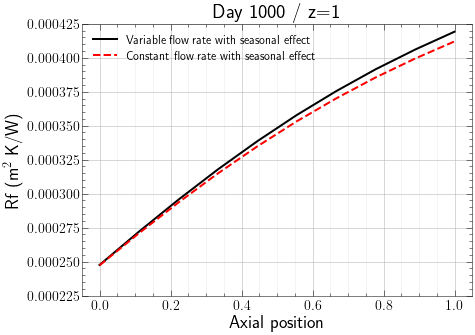

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


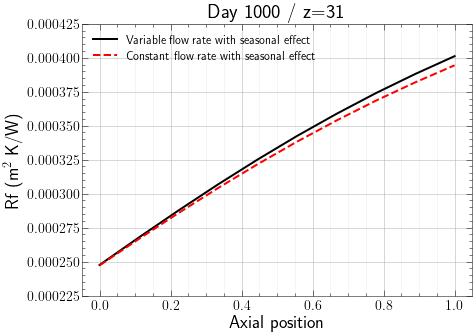

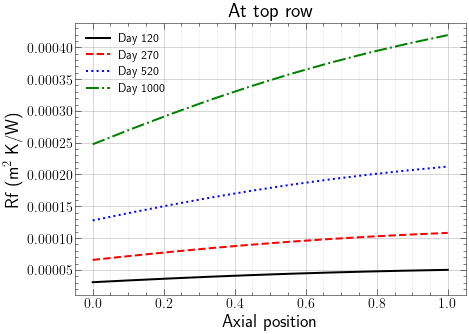

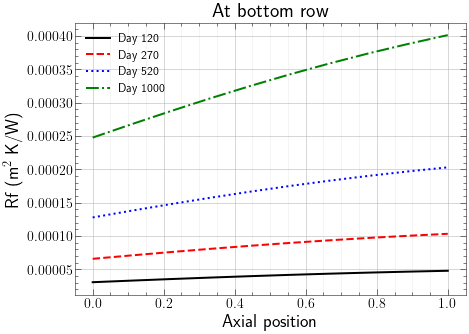

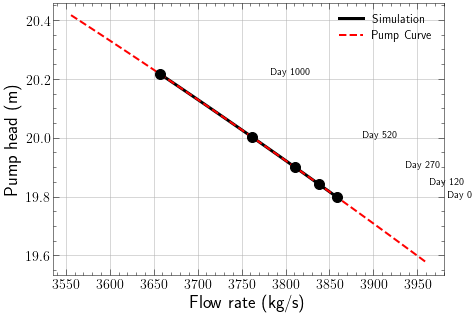

In [10]:
plot_("colesoncove")

## Navajo Case

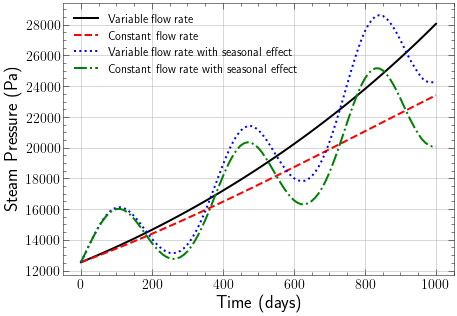

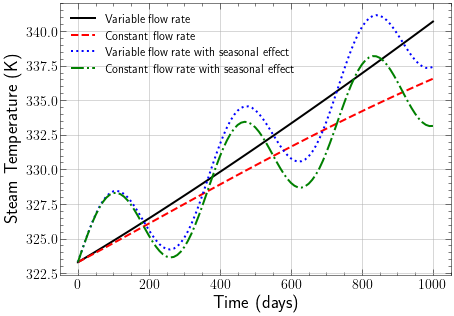

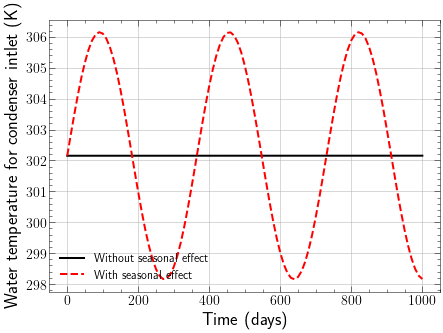

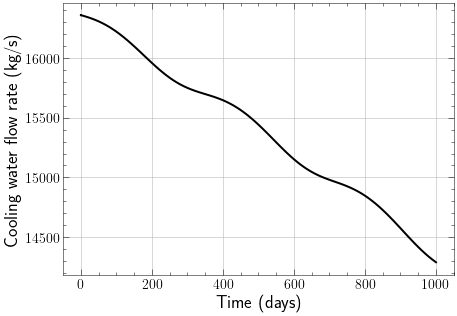

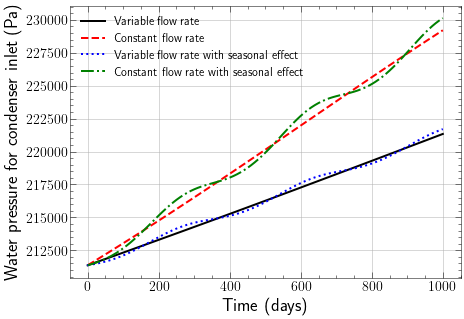

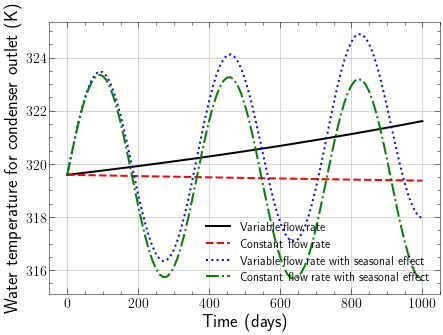

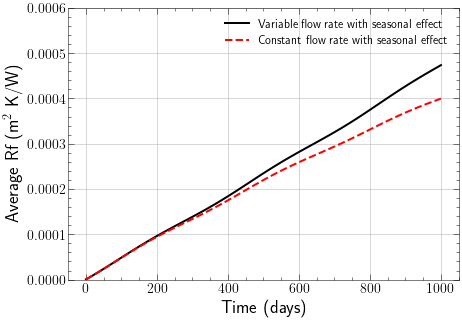

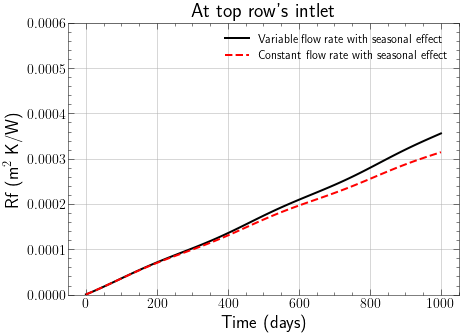

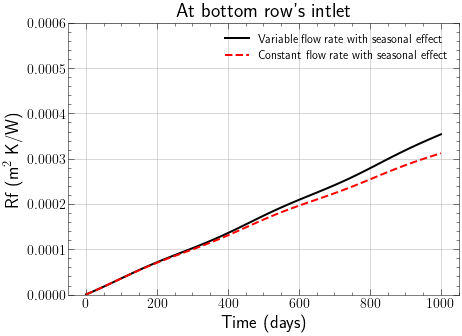

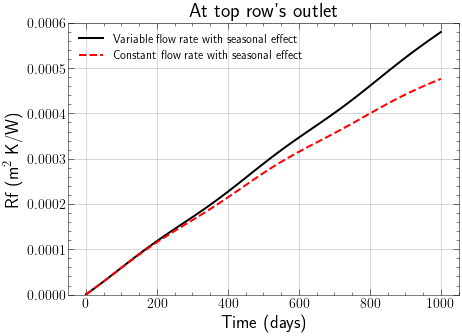

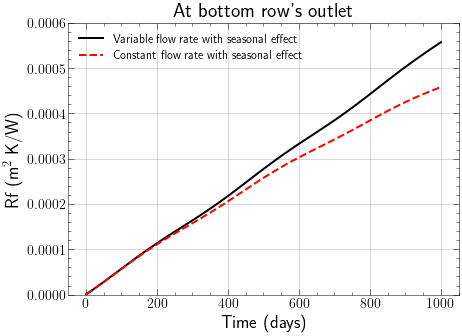

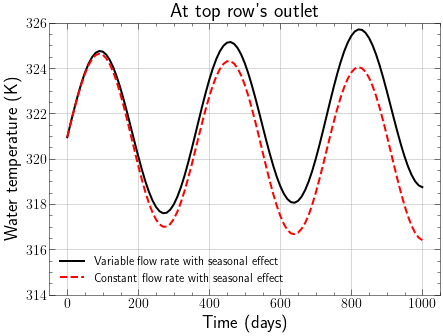

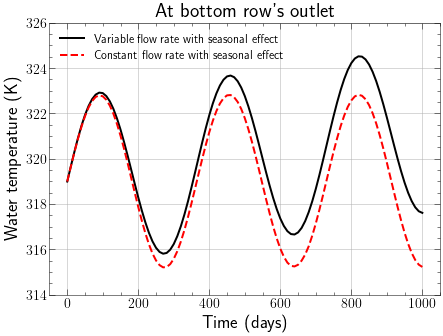

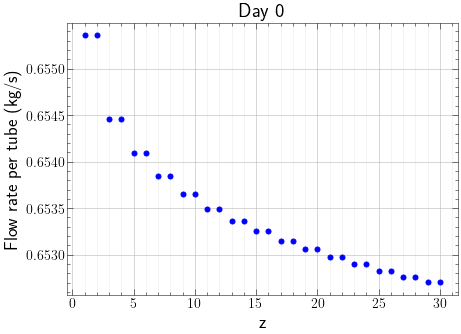

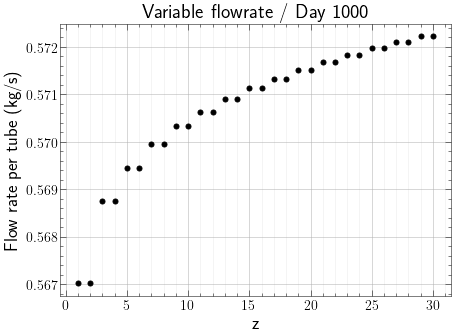

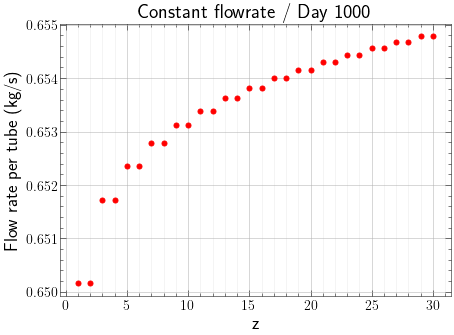

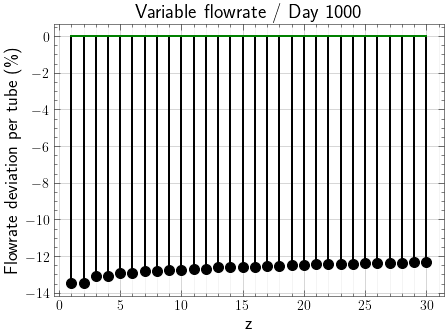

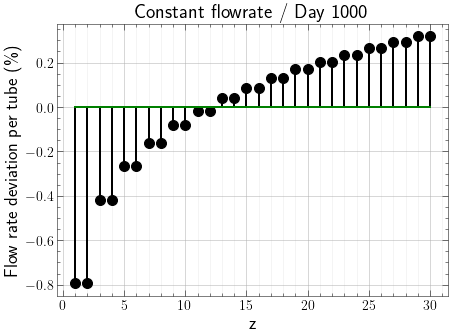

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


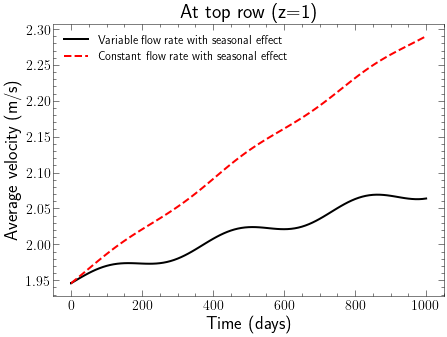

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


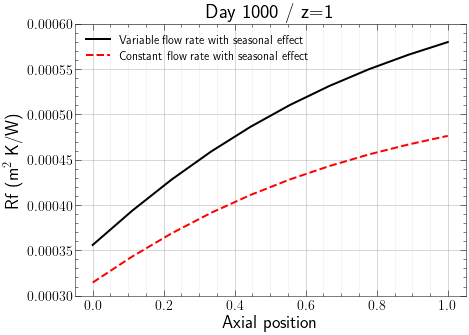

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


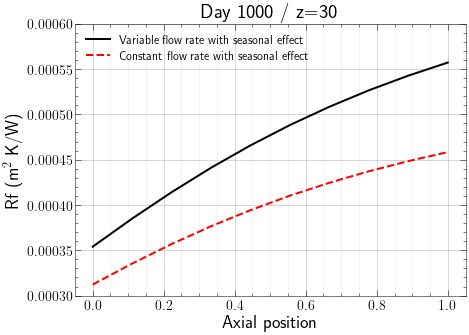

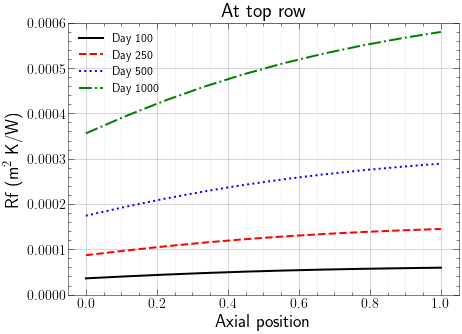

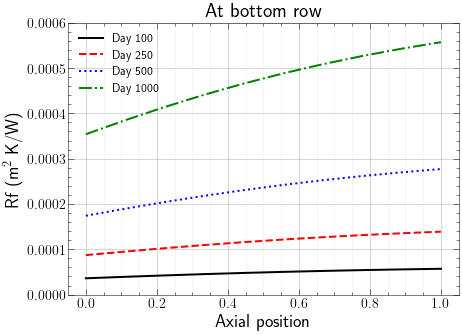

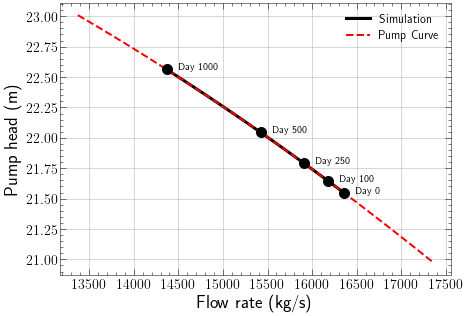

In [11]:
plot_("navajo", last_row_index=29,Rf_ylim=(0.0003, 0.0006), Tout_ylim=(314, 326), Rf_ylim_trend=(0,0.0006), Rf_ylim_trend_t=(0,0.0006))

## Belchatow Case

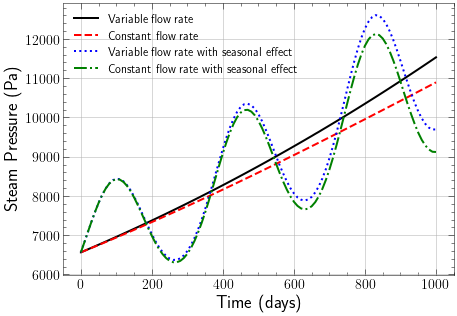

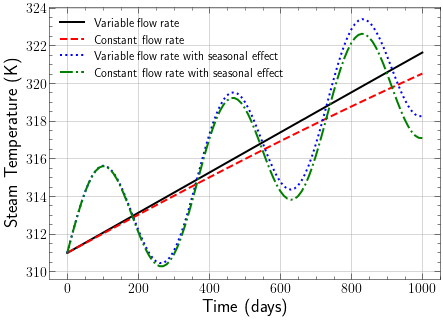

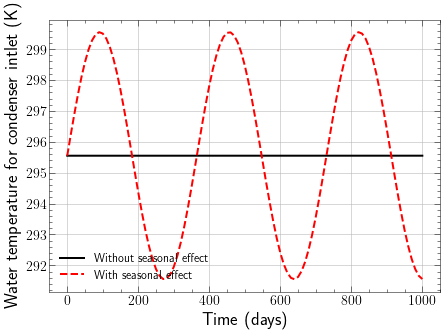

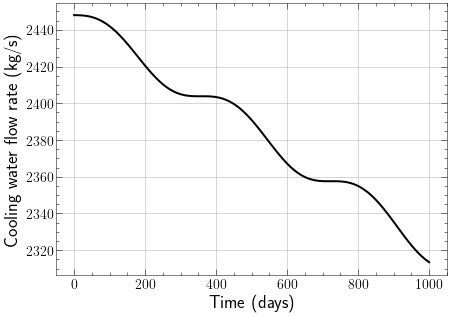

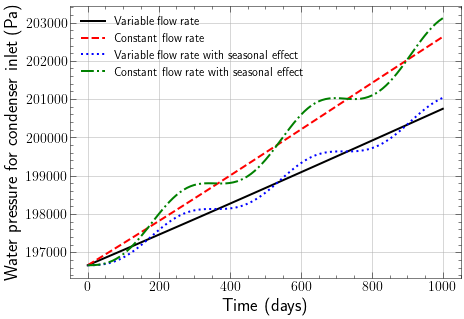

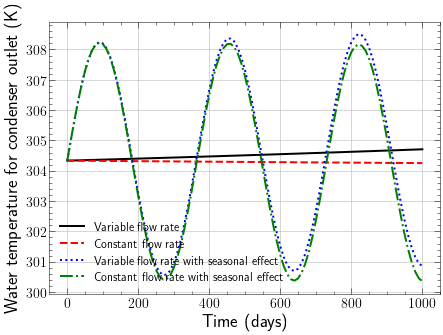

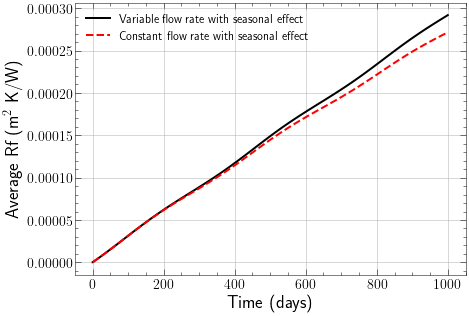

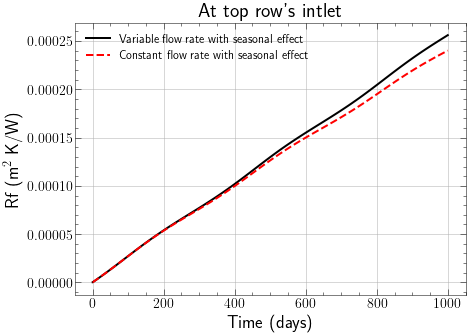

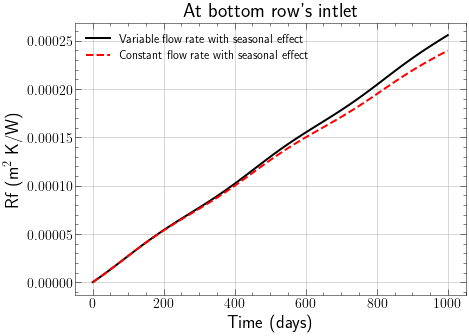

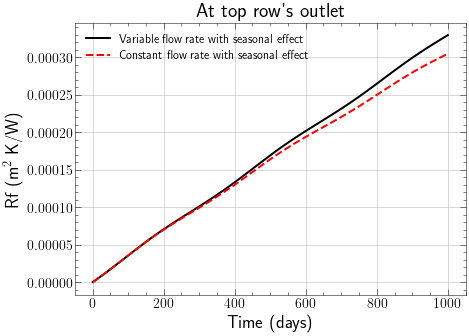

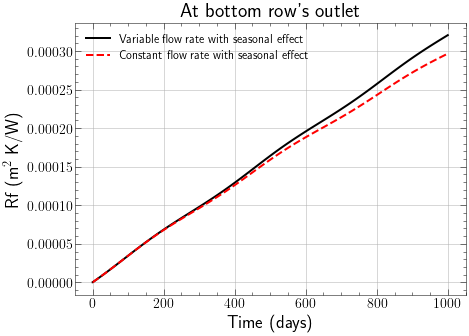

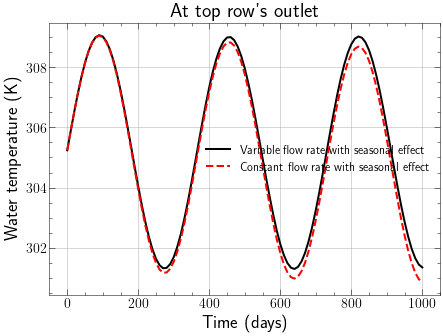

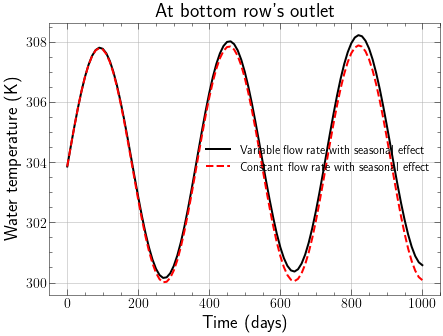

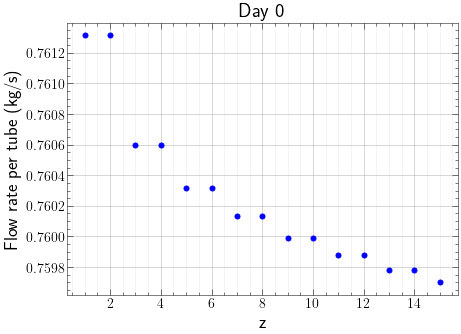

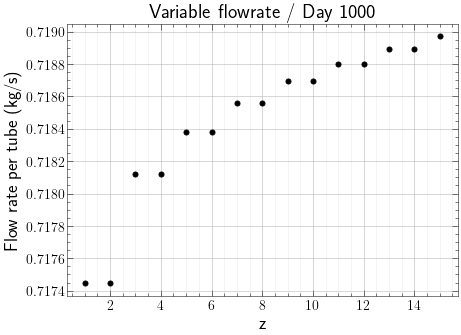

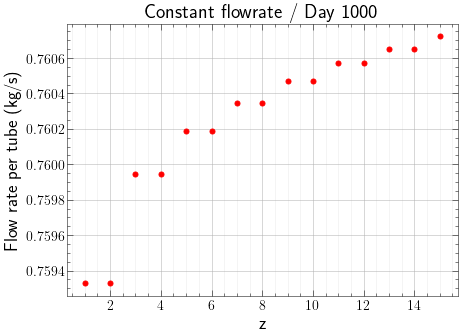

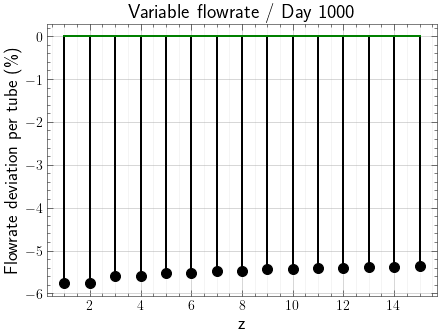

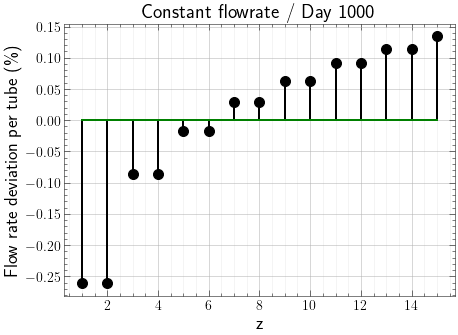

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


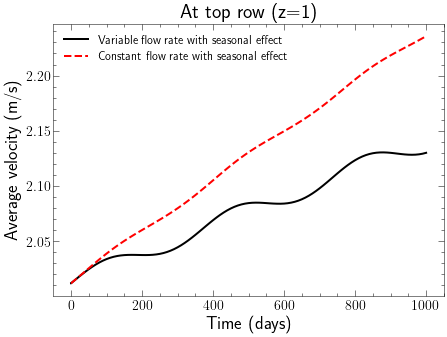

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


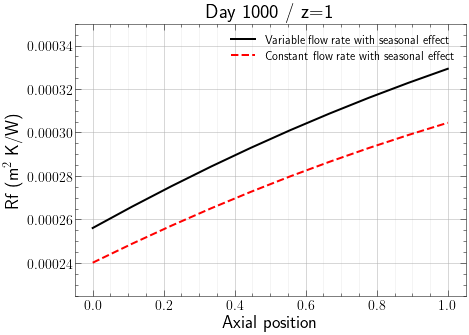

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


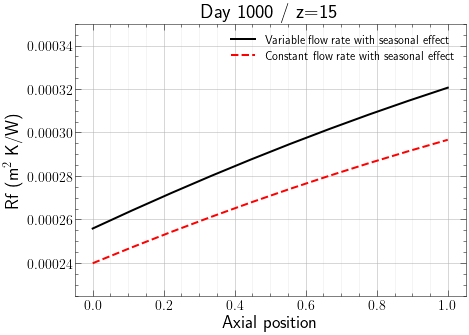

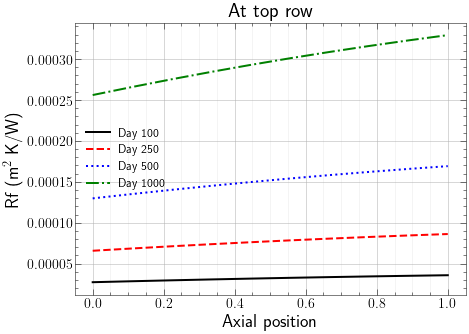

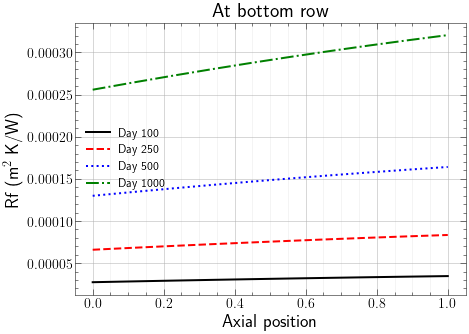

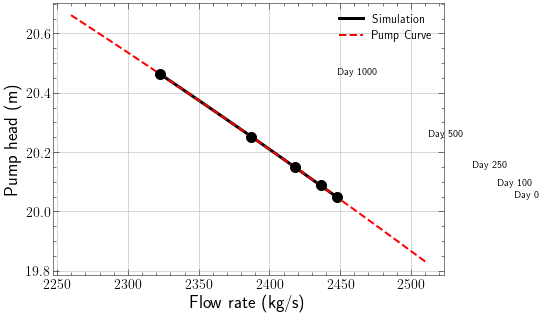

In [12]:
plot_("belchatow", last_row_index=14,Rf_ylim=(0.000225, 0.00035))

## Navajo Case (with mean hExt)

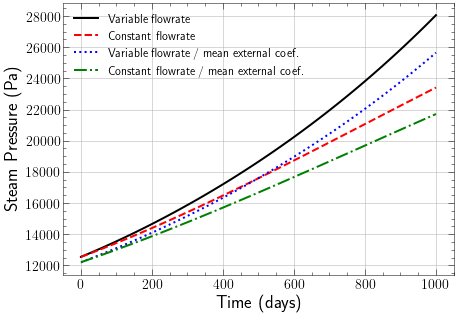

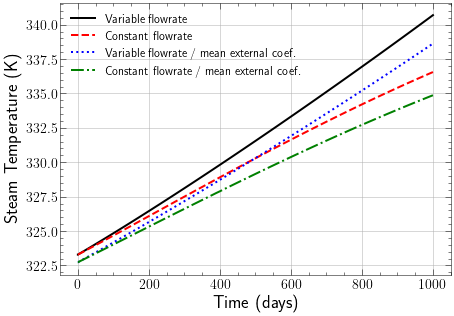

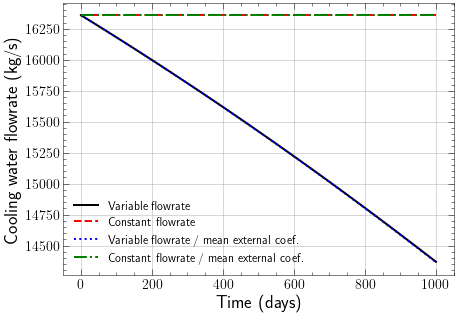

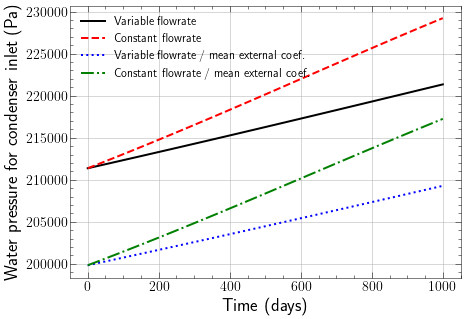

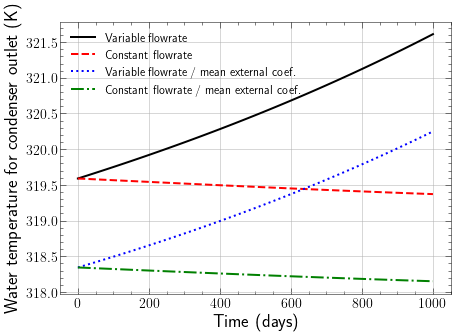

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: Matplotli

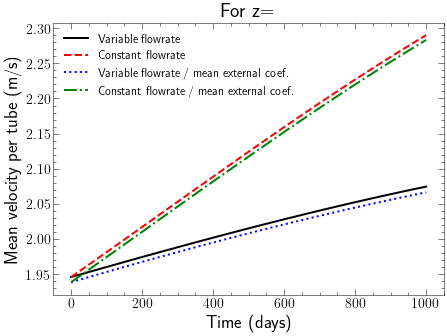

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: Matplotli

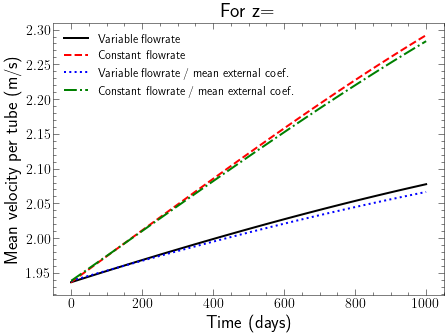

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Ad

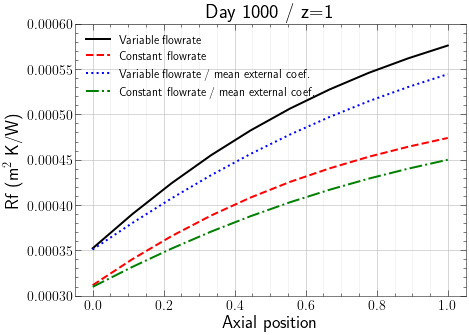

/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/jaimenms/WorkingFolder/study-daetools/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Ad

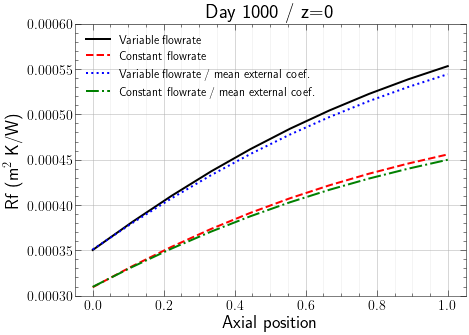

In [13]:
name = "navajo"

case = name+"_cs_pumped.out.json"
with open(case) as f:
    json_data=f.read()
output = json.loads(json_data)

case = name+"_cslz_pumped.out.json"
with open(case) as f:
    json_data=f.read()
output_s = json.loads(json_data)

case = name+"_cs_fixedW.out.json"
with open(case) as f:
    json_data=f.read()
output_fixedW = json.loads(json_data)

case = name+"_cslz_fixedW.out.json"
with open(case) as f:
    json_data=f.read()
output_fixedW_s = json.loads(json_data)

plot_trends("hExtMean_"+name+"_trend_Pvap",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    "condenser.Pext",
    ylabel = "Steam Pressure (Pa)"
   )

plot_trends("hExtMean_"+name+"_trend_Tvap",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    "condenser.Text",
    ylabel = "Steam Temperature (K)"
   )

plot_trends("hExtMean_"+name+"_trend_water_flowrate",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    "node_B.w",
    ylabel = "Cooling water flowrate (kg/s)"
   )

plot_trends("hExtMean_"+name+"_trend_water_Pin",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    "node_B.P",
    ylabel = "Water pressure for condenser inlet (Pa)"
   )

plot_trends("hExtMean_"+name+"_trend_water_Tout",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    "node_C.T",
    ylabel = "Water temperature for condenser outlet (K)"
   )

plot_trends_2("hExtMean_"+name+"_trend_v_for_z_eq_1",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    0,
    "condenser.v",
    ylabel = "Mean velocity per tube (m/s)",
    title="For z={}"
    #ylim=(0.35,0.6)
)

plot_trends_2("hExtMean_"+name+"_trend_v_for_z_eq_1",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    -1,
    "condenser.v",
    ylabel = "Mean velocity per tube (m/s)",
    title="For z={}"
    #ylim=(0.35,0.6)
)

plot_profiles("hExtMean_"+name+"_profile_Rf_for_z_eq_1",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    -1,
    0,
    "condenser.Rf",
    ylabel = "Rf (m$^2$ K/W)",
    ylim=(0.0003, 0.0006)
   )

plot_profiles("hExtMean_"+name+"_profile_Rf_for_z_eq_31",
    [output, output_fixedW, output_s, output_fixedW_s],
    ["Variable flowrate", "Constant flowrate", "Variable flowrate / mean external coef.", "Constant flowrate / mean external coef."],
    -1,
    -1,
    "condenser.Rf",
    ylabel = "Rf (m$^2$ K/W)",
    ylim=(0.0003, 0.0006)
   )